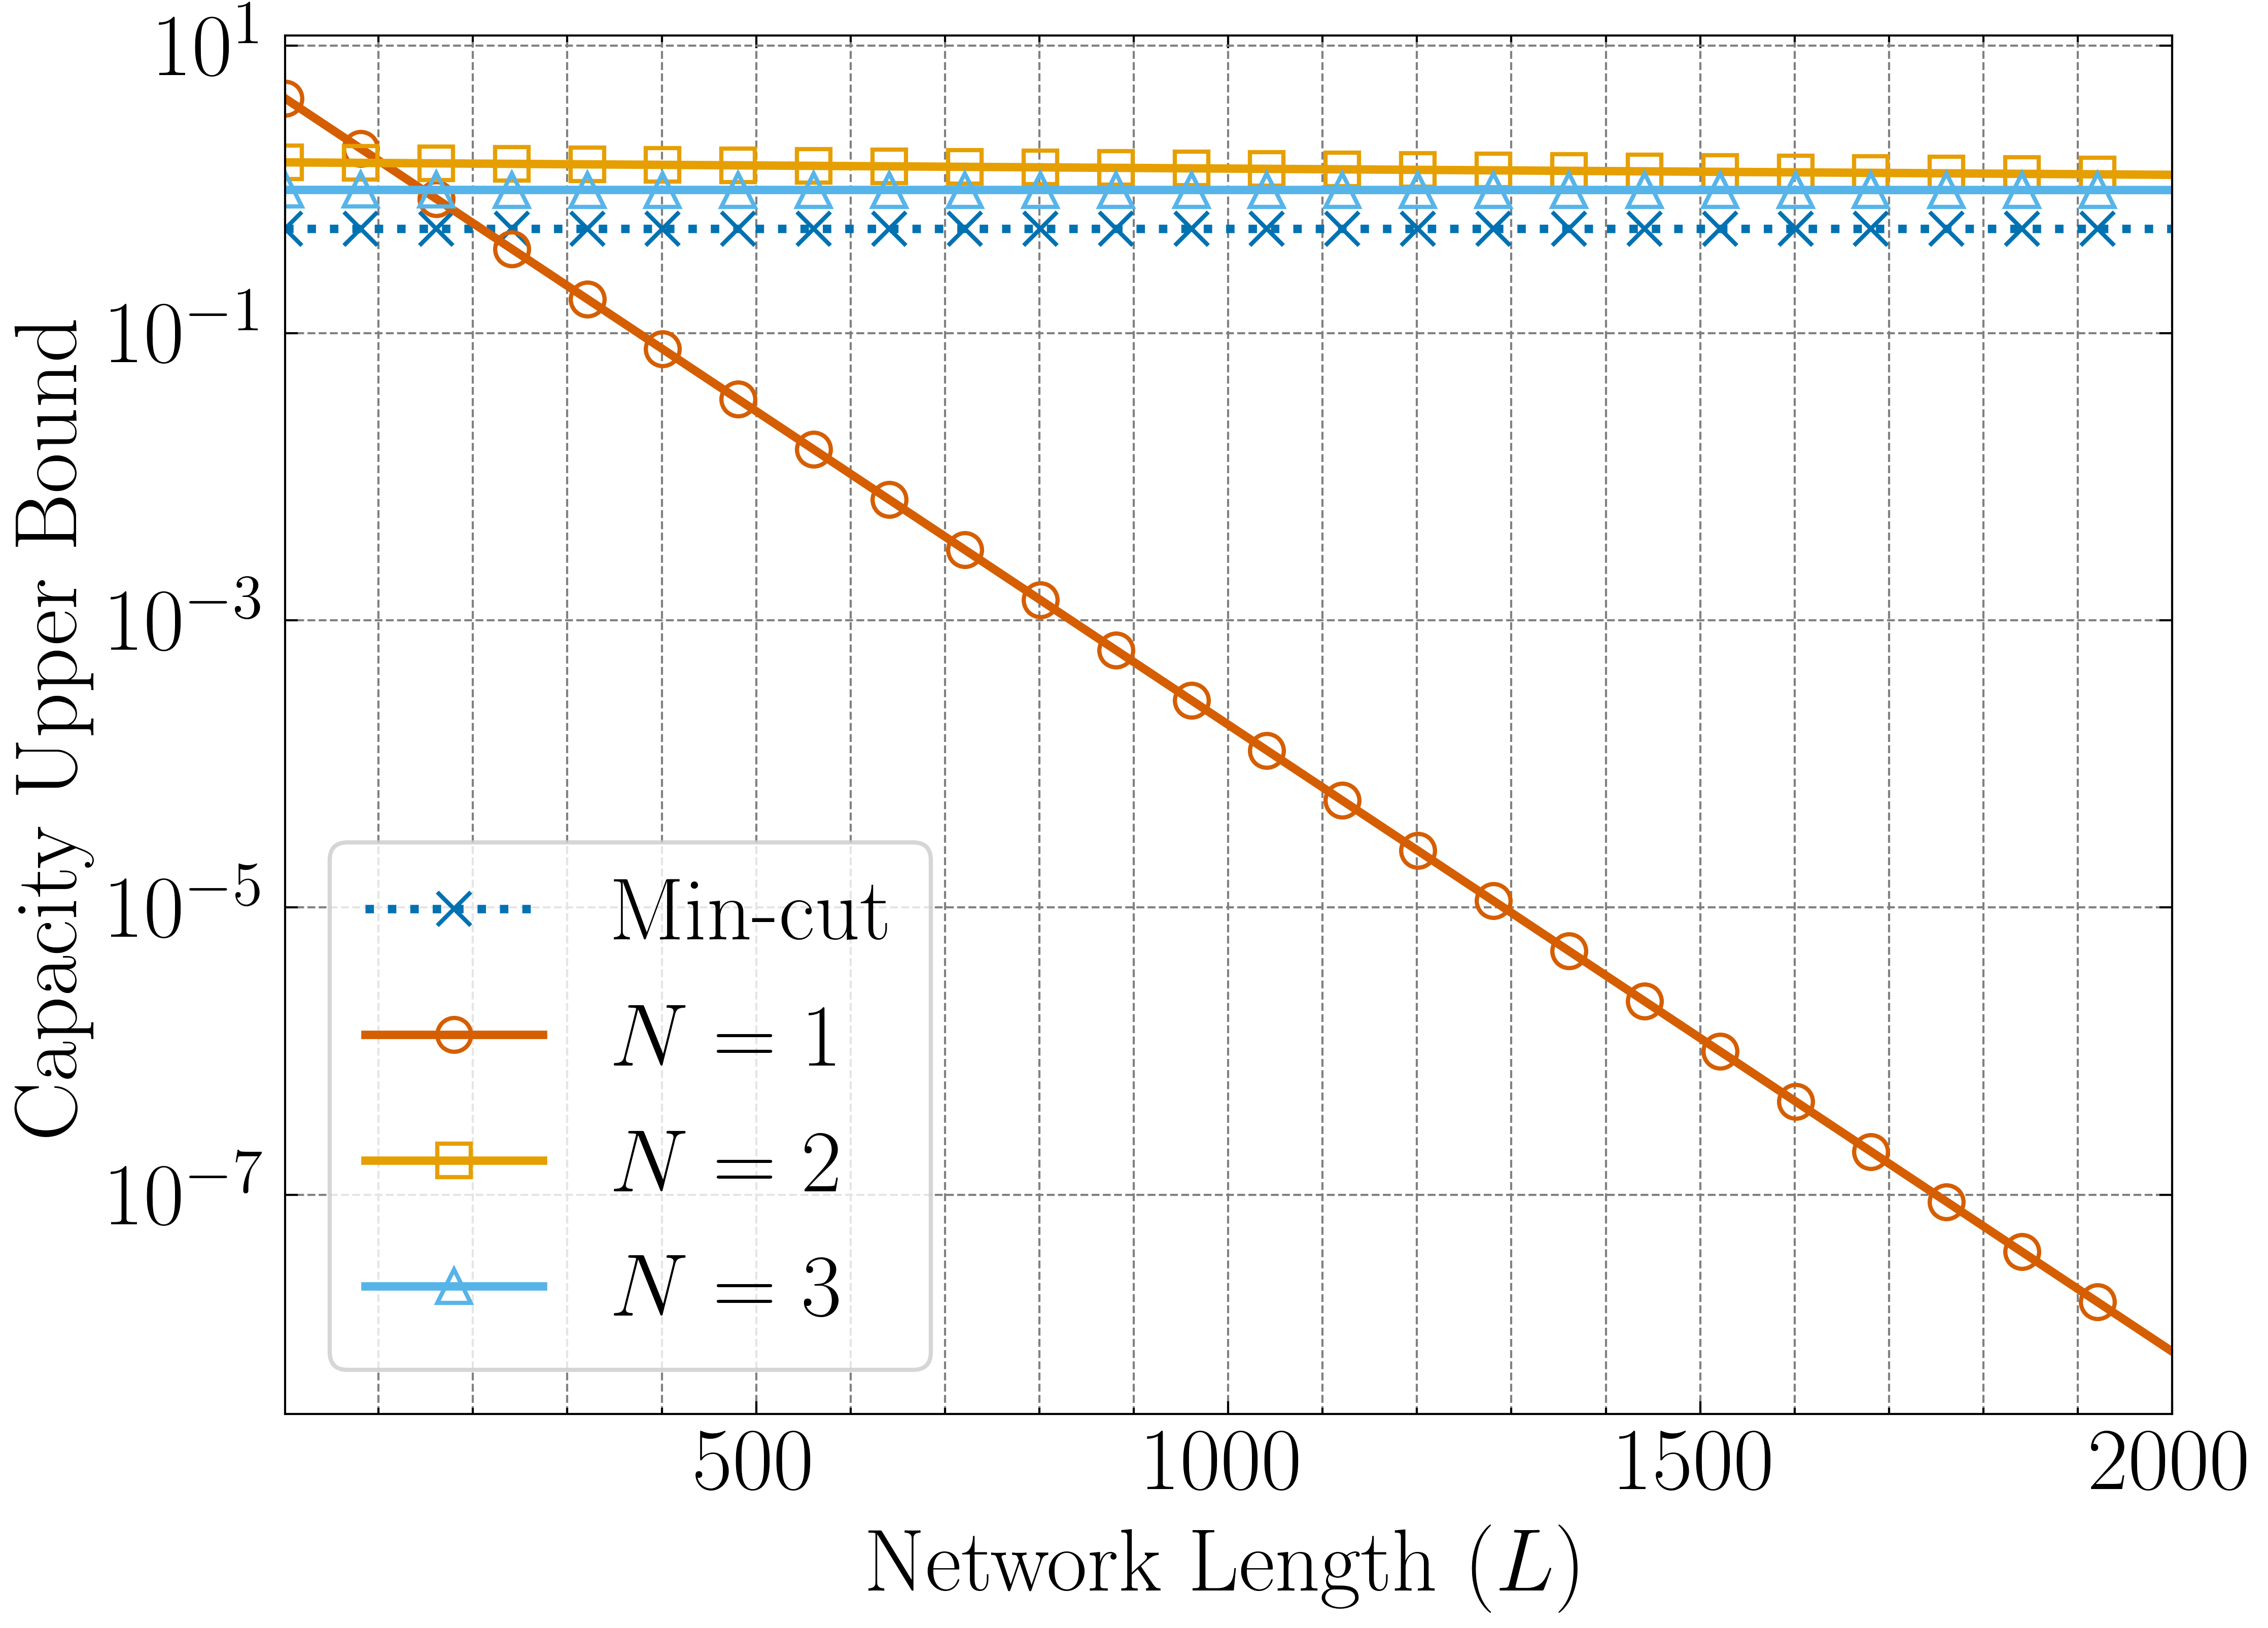

In [12]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=100)
plt.style.use(['science','ieee'])
plt.rcParams['grid.color'] = 'gray'  # Grid color
plt.rcParams['grid.linestyle'] = '--'  # Grid line style
plt.rcParams['grid.linewidth'] = 0.5  # Grid line width
plt.rcParams['legend.frameon'] = True  # Show the legend border
def binary_entropy(p):
    """
    Compute binary entropy for a given probability.

    Parameters:
    - p: Probability (between 0 and 1)

    Returns:
    - entropy: Binary entropy for the given probability
    """
    if p == 0 or p == 1:
        return 0  # Entropy is 0 for perfectly certain events

    entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    return entropy





epsilon_hist = [0.1]
for idx in range(len(epsilon_hist)):
    epsilon = epsilon_hist[idx]

    N_hist = [1,2,3]
    L_hist = np.arange(1, 2001)
    rate_opt_hist = np.zeros([len(L_hist), len(N_hist)])

    for i in range(len(L_hist)):
        for j in range(len(N_hist)):
            N, L = N_hist[j], L_hist[i]
            error = epsilon ** (2*N)
            rate = (1 - error) ** L
            epsilon_N = epsilon ** N

            C_Q = 1-binary_entropy(epsilon)
            p_0 = (epsilon * (1-epsilon)) ** N
            q_opt = (1-epsilon) ** N

            U_y = (q_opt + p_0) * np.log2((q_opt - p_0)/(epsilon_N - p_0)) + N * q_opt * np.log2(epsilon) - q_opt * np.log2(q_opt)#p_0 * np.log2(1-p_0) - p_0 *np.log2(epsilon**N - p_0) + np.log2(epsilon_N * (1-p_0)  /  (epsilon_N - p_0))


            C_Q_N = C_Q + 1/N*U_y#np.log2(epsilon_N * (1-p_0)  /  (epsilon_N - p_0))
            C_Q_N = 1/(1-p_0) * C_Q_N
            rate_opt_hist[i,j] = rate * C_Q_N

    #print(rate_opt_hist)
    #print(1-binary_entropy(epsilon))


    # Create the figure and axis
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Plot the data
    C_Q = 1-binary_entropy(epsilon)

    ax.semilogy(L_hist, (1-binary_entropy(epsilon))*np.ones(2000), color="#0072B2", linestyle=':', label=r'Min-cut', linewidth=2,
                                            marker='x', markersize=8, markevery=80, markerfacecolor='none')




    ax.semilogy(L_hist, rate_opt_hist[:,0], color="#D55E00", linestyle='solid', label='$N=1$', linewidth=2, 
                                            marker='o', markersize=8, markevery=80, markerfacecolor='none')
    ax.semilogy(L_hist, rate_opt_hist[:,1], color="#E69F00", linestyle='solid', label='$N=2$', linewidth=2, 
                                            marker='s', markersize=8, markevery=80, markerfacecolor='none')
    ax.semilogy(L_hist, rate_opt_hist[:,2], color="#56B4E9", linestyle='solid', label='$N=3$', linewidth=2, 
                                            marker='^', markersize=8, markevery=80, markerfacecolor='none')

    # Set axis labels and title
    ax.set_xlabel('Network Length ($L$)', fontsize=21)
    ax.set_ylabel(r'Capacity Upper Bound', fontsize=21)
    # Set x-axis limits
    ax.set_xlim(1, 2000)
    # Show legend
    #ax.set_title("epsilon = "+str(epsilon), fontsize=21)
    ax.legend(loc='best', fontsize=21)
    # Show the grid
    ax.grid(True, which='both')
    ax.tick_params(axis='both', labelsize=21)
    plt.savefig('figa_revision_BSC_upper_' + str(idx) + '.pdf', bbox_inches='tight')






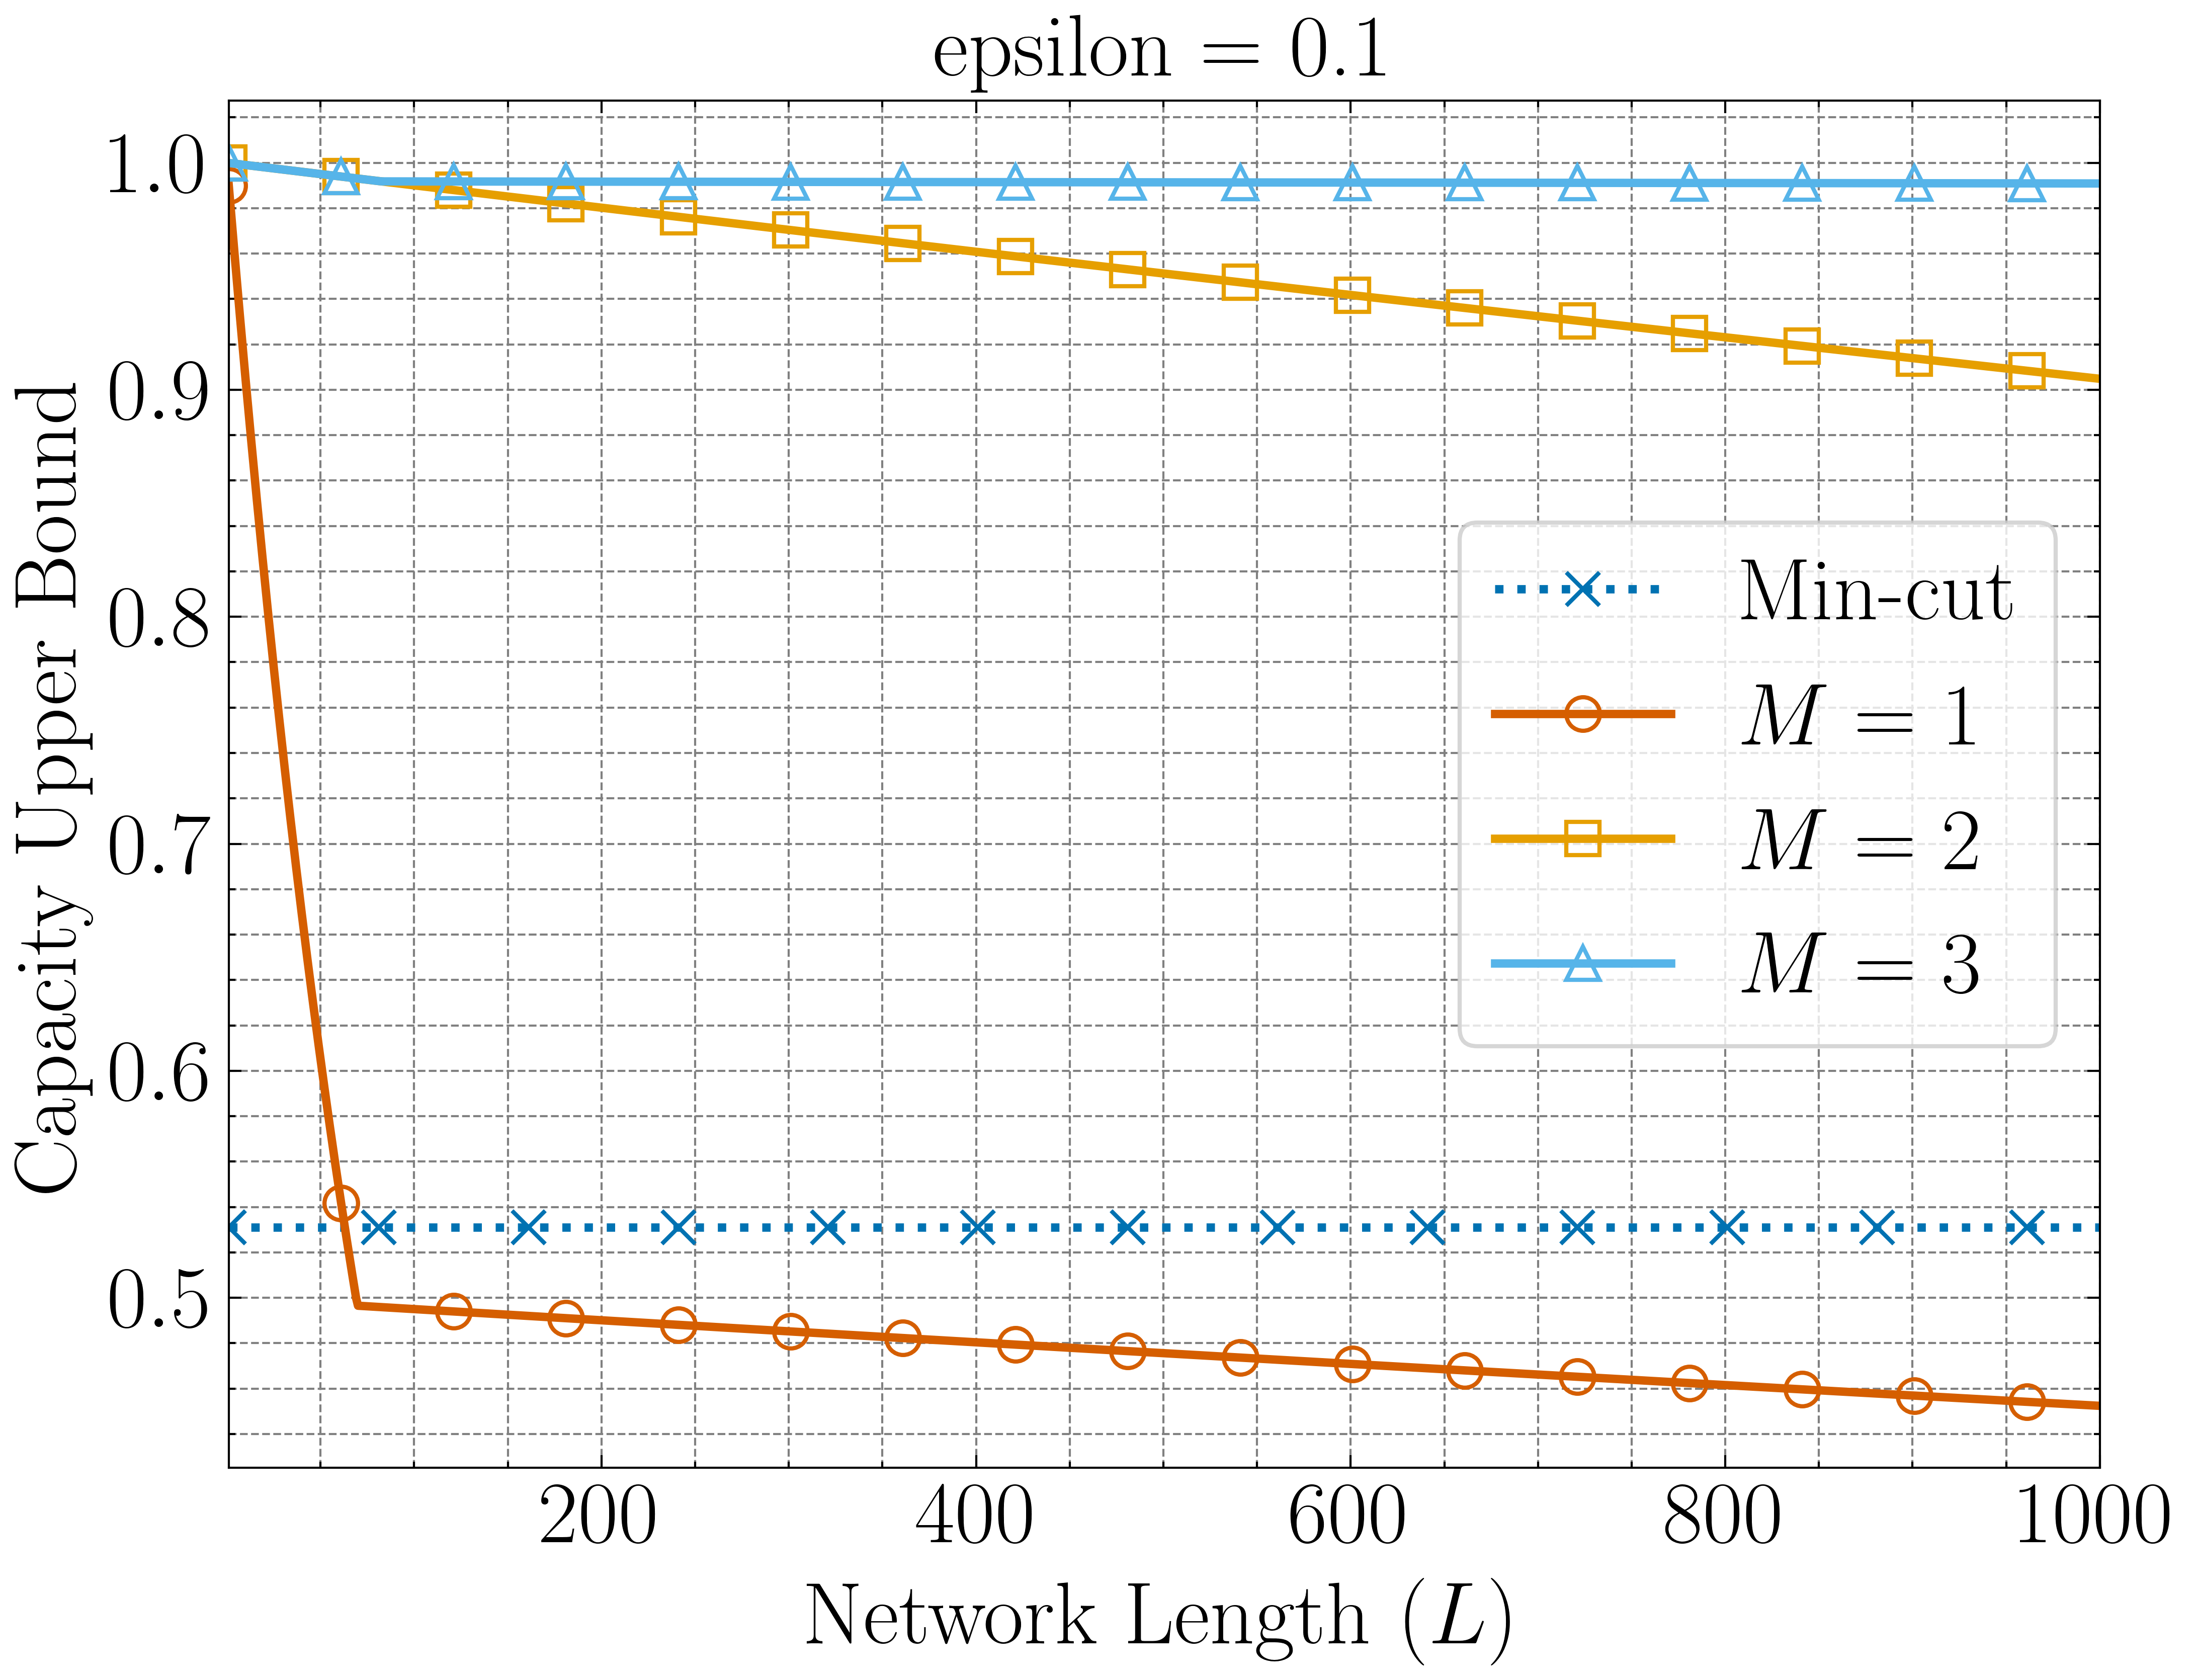

In [13]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=50)
plt.style.use(['science','ieee'])
plt.rcParams['grid.color'] = 'gray'  # Grid color
plt.rcParams['grid.linestyle'] = '--'  # Grid line style
plt.rcParams['grid.linewidth'] = 0.5  # Grid line width
plt.rcParams['legend.frameon'] = True  # Show the legend border


def binary_entropy(p):
    """
    Compute binary entropy for a given probability.

    Parameters:
    - p: Probability (between 0 and 1)

    Returns:
    - entropy: Binary entropy for the given probability
    """
    if p == 0 or p == 1:
        return 0  # Entropy is 0 for perfectly certain events

    entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)
    return entropy

epsilon_hist = [0.1]
for idx in range(len(epsilon_hist)):
    epsilon = epsilon_hist[idx]



    M_hist = [1,2,3]
    L_hist = np.arange(1, 1001)
    rate_opt_hist = []
    N_opt_hist    = []
    N_hist = np.arange(1, 10)


    
    for L in L_hist:
        for M in M_hist:
            rate_obj_hist = []
            for N in N_hist:
                error = epsilon ** (2*N)
                rate = (1 - error) ** L

                epsilon_N = epsilon ** N


                C_Q = 1-binary_entropy(epsilon)
                p_0 = (epsilon * (1-epsilon)) ** N
                q_opt = (1-epsilon) ** N

                U_y = (q_opt + p_0) * np.log2((q_opt - p_0)/(epsilon_N - p_0)) + N * q_opt * np.log2(epsilon) - q_opt * np.log2(q_opt)#p_0 * np.log2(1-p_0) - p_0 *np.log2(epsilon**N - p_0) + np.log2(epsilon_N * (1-p_0)  /  (epsilon_N - p_0))


                C_Q_N = C_Q + 1/N*U_y#np.log2(epsilon_N * (1-p_0)) - 1/N*np.log2(epsilon_N - p_0)
                #print(C_Q_N)
                C_Q_N = 1/(1-p_0) * C_Q_N

                ratio = np.minimum(M/N, 1)
                rate_MNL = rate  * np.minimum(ratio,C_Q_N)


                rate_obj_hist.append(rate_MNL)

        
            rate_obj_hist    = np.array(rate_obj_hist)
            index_of_max = np.argmax(rate_obj_hist)
            N_opt        = N_hist[index_of_max]
            rate_opt     = np.max(rate_obj_hist)

            #print("Hop: ", L, "M: ", M, "Nopt: ", N_opt, "rate_opt: ", rate_opt)
            rate_opt_hist.append(rate_opt)
            N_opt_hist.append(N_opt)


    capacity = 1-binary_entropy(epsilon)
    rate_opt_hist = np.array(rate_opt_hist).reshape([len(L_hist), len(M_hist)])



    L = np.arange(1, 1001)

    # Create the figure and axis
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Plot the data
    ax.plot(L_hist, capacity*np.ones(1000), color="#0072B2", linestyle=':', label=r'Min-cut', linewidth=2,
                                            marker='x', markersize=8, markevery=80, markerfacecolor='none')


    ax.plot(L_hist, rate_opt_hist[:,0], color="#D55E00", linestyle='solid', label=r'$M=1$', linewidth=2,
                                        marker='o', markersize=8, markevery=60, markerfacecolor='none')
    ax.plot(L_hist, rate_opt_hist[:,1], color="#E69F00", linestyle='solid', label=r'$M=2$', linewidth=2,
                                        marker='s', markersize=8, markevery=60, markerfacecolor='none')
    ax.plot(L_hist, rate_opt_hist[:,2], color="#56B4E9", linestyle='solid', label=r'$M=3$', linewidth=2,
                                        marker='^', markersize=8, markevery=60, markerfacecolor='none')

    # Set axis labels and title
    ax.set_xlabel('Network Length ($L$)',fontsize=21)
    ax.set_ylabel('Capacity Upper Bound',fontsize=21)

    # Set x-axis limits
    ax.set_title("epsilon = "+str(epsilon), fontsize=21)
    ax.set_xlim(1, 1000)

    # Show legend
    ax.legend(loc='best', fontsize=21)

    # Show the grid
    ax.grid(True, which='both')
    ax.tick_params(axis='both', labelsize=21)
    plt.savefig('figc_revision_BSC_upper_' + str(idx) + '.pdf', bbox_inches='tight')
